In [1]:
#Figure 4 graph plotting 
#v1.0 version, this is the first consolidation of analysis done so far
#Requires the environment packages found in 23pubenv

In [20]:
#General Import Packages: 
#Plotting
from matplotlib import pyplot as plt
from matplotlib import colors, cm
from matplotlib.collections import LineCollection
import seaborn as sns
import trackpy as tp
import matplotlib.patches as patch
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

#Numerics, model implementation, path management, extras: 
import numpy as np
import pandas as pd
from pathlib import Path
import random as rand
from tqdm import tqdm 
from scipy.special import erfc

#Signal Analysis Functions: 
from scipy.signal import savgol_filter
from scipy.signal import peak_widths
from scipy.optimize import curve_fit



In [21]:
#Importing the relevant data frames is done using the following structure: 

#Set the base path as the root for an analysis set, all sets are arranged where images and analysis outputs are in the following locations: 
#base_path = Path('/media/echo/Samsung_T5/Main Data/Analysis Sets/23 Protofigures/Data Sets/2023_01_24_main-set')
base_path = Path.cwd().parent / 'Data Sets/2023_01_24_main-set'
images_folder = base_path / 'images'
analysis_output_destination = base_path / 'wavefit_outputs'

#There are three important dataframes used in analysis, the wave data frame, the ARCOS df, and the tracking df with binnned calcium values:
#The tracking is the most broad, followed by ARCOS and then the wave (most abstracted info):
wave_dataframe_paths = sorted(analysis_output_destination.glob('*_wave_df.csv'), key=lambda x: x.stem.split('_')[0])
arcos_dataframe_paths = sorted(analysis_output_destination.glob('*_ARCOS_df.csv'), key=lambda x: x.stem.split('_')[0])
tracking_dataframe_paths = sorted(analysis_output_destination.glob('*_tracking_binned_df.csv'), key=lambda x:x.stem.split('_')[0])


In [22]:
#Custom function to read in centroid arrays into dataframe instead of as a string: 
def read_tuple_list(x):
    x_strip = x.strip('()').strip('[]')
    if len(x_strip.split(', ')) == 1:
        return np.array(x_strip.split(), dtype=float)
    else:
        return np.array(x_strip.split(', '), dtype=float)

In [23]:
def consolidate_waves(WAVE_DF_PATHS, save_DF = False):
    
    wave_collect = []

    for wave_df_path in tqdm(WAVE_DF_PATHS):
        img_id = int(wave_df_path.stem.split('_')[0]) #Get the image ID to match to the wave:
        wave_df = pd.read_csv(wave_df_path, converters={"wave_centroid": read_tuple_list}) #Open the wave_DF from step4 analysis
        wave_df = wave_df[wave_df.columns.drop(list(wave_df.filter(regex='Unnamed')))] #Strip it of any weird unnamed index columns
        track_ids = wave_df['clTrackID'].values #Get the collective track values in the wave
        wave_df['wave_ID'] = [str(img_id) + '-' + str(i) for i in track_ids] #Build a list of unique wave IDs from the image number and clTrack number they belong to
        wave_df['image_ID'] = [img_id for i in range(len(wave_df))]
        wave_collect.append(wave_df)
    
    wave_df_collected = pd.concat(wave_collect, ignore_index=True)
    
    if save_DF:
        wave_df_collected.to_csv(WAVE_DF_PATHS[0].parent / 'combined_wave_DF.csv', index=False)
        
    return wave_df_collected

In [24]:
wave_con_df = consolidate_waves(wave_dataframe_paths)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 57/57 [00:00<00:00, 521.19it/s]


/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

<Axes: xlabel='rel_time', ylabel='r_squared'>

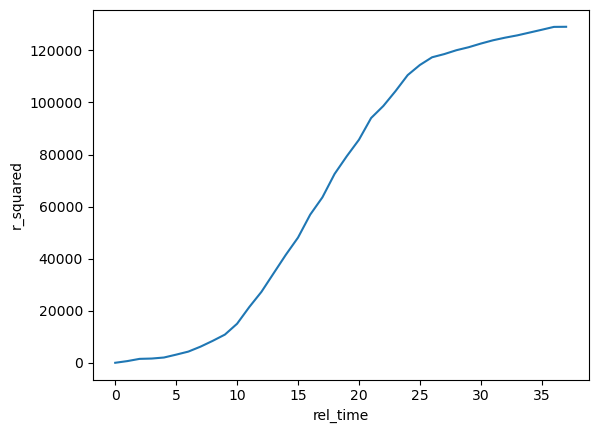

In [25]:
sns.lineplot(data = wave_con_df[wave_con_df.wave_ID == '49-19'], x='rel_time', y='r_squared')

In [26]:
wave_con_df[wave_con_df.wave_ID == '49-19'].rel_time.values*5.0

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
       110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
       165., 170., 175., 180., 185.])

In [27]:
wave_con_df[wave_con_df.wave_ID == '49-19'].r_squared.values

array([     0.        ,    652.3903751 ,   1504.15181031,   1629.34077043,
         2024.20226649,   3127.57430273,   4296.14423817,   6197.18847584,
         8425.26369935,  10827.7688865 ,  14996.92468616,  21408.90944027,
        27263.52359469,  34388.95069267,  41487.90825463,  48098.73841293,
        56912.7512542 ,  63545.76253556,  72548.72842657,  79349.29640843,
        85686.76706147,  94042.4033674 ,  98652.99618929, 104365.11011299,
       110527.00198908, 114406.76787636, 117365.14543429, 118591.11650954,
       120082.55315424, 121224.80498612, 122629.72566418, 123895.33949133,
       124908.6664619 , 125791.44142316, 126862.56671223, 127938.40591212,
       129039.61989356, 129082.27832996])

In [28]:
trackable_waves = wave_con_df[wave_con_df['trackable']==True]

In [57]:
wave_bin = []

for wid, wave in trackable_waves.groupby('wave_ID'):
    if wave.rel_r.max() > 300:
        wave_bin.append(wave)
binned_track_waves = pd.concat(wave_bin)
binned_track_waves['real_time'] = 5.0*binned_track_waves['rel_time']
binned_track_waves['real_radius_sq'] = binned_track_waves['circle_radius']**2

In [109]:
#relay_output = pd.read_csv('/media/echo/Samsung_T5/Main Data/Analysis Sets/23 Protofigures/Fig3 - Model vs Data Stop/model/simple_relay_output.csv')
stopped_output_L_th = pd.read_csv(Path.cwd().parent / 'Fig2 - Wave kinetics/2fg/fits/whole_stop_fit_Lth.csv')
stopped_output_R_th = pd.read_csv(Path.cwd().parent / 'Fig2 - Wave kinetics/2fg/fits/whole_stop_fit_Rth.csv')

#Exclude where model reports negative relative r (wave stopped or no travel): 
#Also, the model shows how concentration contours shrink after wave stopping, this behavior is irrelevant for comparison with Ca2+ signalling.

wave_stop = stopped_output_L_th['r_relay'].idxmax()

stopped_output_L_th = stopped_output_L_th[stopped_output_L_th['r_relay'] > 0].loc[2:wave_stop,:] #Removed last value as model after stop is not as useful.
stopped_output_R_th = stopped_output_R_th[stopped_output_R_th['r_relay'] > 0].loc[2:wave_stop,:] #Removed last value as model after stop is not as useful.

stopped_output_L_th['r_2'] = (stopped_output_L_th['r_relay'])**2
stopped_output_R_th['r_2'] = (stopped_output_R_th['r_relay'])**2

In [96]:
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2, 'font.family': ['arial'], 'axes.linewidth':2})

/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/echo/miniconda3/envs/23pubenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

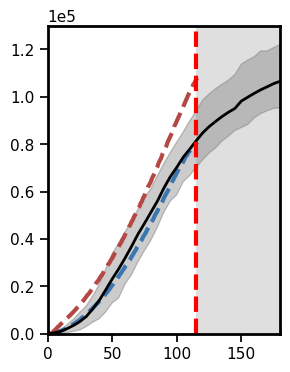

In [122]:
plt.figure(figsize=(3,4))
sns.lineplot(data=stopped_output_L_th, x='time', y='r_2', linestyle='--', color = '#3B76B0', linewidth=3)
sns.lineplot(data=stopped_output_R_th, x='time', y='r_2', linestyle='--', color = '#B54845', linewidth=3)
sns.lineplot(data=binned_track_waves, x='real_time', y='r_squared', linewidth=2, color='black')
plt.vlines(wave_stop, ymin=0, ymax=130000, linestyles='--', color='red', linewidth=3)
plt.fill_between([wave_stop,180], 0, 130000, facecolor='grey', alpha=0.25)
plt.xlim(0,180)
plt.ylim(0,130000)
plt.xlabel('')
plt.ylabel('')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.savefig('fig4d_dual_conc-v-data.png', dpi=300, bbox_inches='tight')

In [42]:
data_to_export

,circle_radius,relative_radius,radius_squared
real_time,,,
0.0,44.533015,0.000000,0.000000
5.0,62.516219,17.983205,323.395649
10.0,72.529137,27.996122,783.782854
15.0,83.055023,38.522008,1483.945137
20.0,94.611623,50.078608,2507.866982
...,...,...,...
300.0,341.980603,297.447588,88475.067875
305.0,340.617034,296.084020,87665.746625
310.0,339.625190,295.092175,87079.391783


In [70]:
data_to_export = pd.DataFrame(binned_track_waves.groupby('real_time').circle_radius.mean())
data_to_export['relative_radius'] = data_to_export['circle_radius'] - data_to_export['circle_radius'][0]
data_to_export['radius_squared'] = data_to_export.relative_radius**2



In [72]:
data_to_export.to_csv('Fig3d_largest-waves-mean-radius-v-time.csv')

##### plt.figure(figsize=(3,4))
sns.lineplot(data=relay_output, x='time', y='radius', linestyle='--', color = 'k', linewidth=2)
sns.lineplot(data=binned_track_waves, x='real_time', y='rel_r', linewidth=2)
plt.xlim(0,175)

plt.xlabel('')
plt.ylabel('')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

In [87]:
data_ts = []
data_rs = []

for t, timepoint in binned_track_waves.groupby('real_time'):
    data_ts.append(t)
    data_rs.append(timepoint.rel_r.mean())

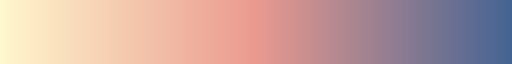

In [90]:
colors.LinearSegmentedColormap.from_list(colors=['#fff7cd','#ea9a8f', '#456493'], name='lbupu')

In [110]:
normed = colors.Normalize(vmin=30, vmax=100)
#cmap_vals = sns.color_palette("Set3", as_cmap=True)
cmap_vals = colors.LinearSegmentedColormap.from_list(colors=['#fff7cd','#ea9a8f', '#456493'], name='lbupu')

(-500.0, 500.0)

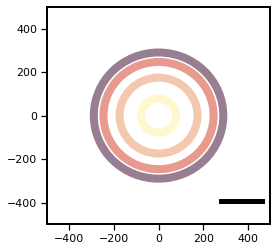

In [31]:
fig, ax = plt.subplots(figsize=(4,4))
r_vals = data_rs[:30]

for i,r_val in enumerate(r_vals):
    if i%6 == 0:
        c = patch.Circle((0,0), r_val, fill=False, edgecolor=cmap_vals(normed(data_ts[i])), linewidth=8)
        #print(data_ts[i])
        ax.add_patch(c)

scalebar = AnchoredSizeBar(ax.transData,
                           200, '',  'lower right', 
                           pad=0.5,
                           color='black',
                           frameon=False,
                           size_vertical=15)

ax.add_artist(scalebar)
        
plt.xlim(-500,500)
plt.ylim(-500,500)


In [112]:
#final_ts = range(1,301,step=100)

#ts = 0.005:0.005:1.51
#r = [wave_front_r(LTB4_ROS_2d3d_sol_1(t)[:,1], rd_LTB4 , 50, 0.1) for t in ts]

#cmap_vals = sns.color_palette("BuPu",120)

final_ts = range(0,118,20)
t_vals = stopped_output['time'].values

for final_t in final_ts: 

    fig, ax = plt.subplots(figsize=(4,4))
    r_vals = stopped_output['radius'].values[:final_t]

    for i,r_val in enumerate(r_vals):
        if i%25 == 0:
            c = patch.Circle((0,0), r_val, fill=False, edgecolor=cmap_vals(normed(t_vals[i])), linewidth=6)
            #print(t_vals[i])
            ax.add_patch(c)
        
    plt.xlim(-500,500)
    plt.ylim(-500,500)



    filename = "/Volumes/Samsung_T5/Main Data/Analysis Sets/23 Protofigures/Fig3 - Model vs Data Stop/3d_still_outputs/stopping-dual-conc_circles_t-" + str(int(t_vals[final_t])) + ".png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.close()


In [113]:
final_t = 120

fig, ax = plt.subplots(figsize=(4,4))
r_vals = stopped_output['radius']

for i,r_val in enumerate(r_vals):
    if i%25 == 0:
        c = patch.Circle((0,0), r_val, fill=False, edgecolor=cmap_vals(normed(t_vals[i])), linewidth=6)
        #print(t_vals[i])
        ax.add_patch(c)

plt.xlim(-500,500)
plt.ylim(-500,500)



filename = "/Volumes/Samsung_T5/Main Data/Analysis Sets/23 Protofigures/Fig3 - Model vs Data Stop/3d_still_outputs/stopping-dual-conc_circles_t-" + str(int(120)) + ".png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.close()

In [107]:
len([   0.        ,   22.55639098,   30.07518797,   32.58145363,
         37.59398496,   40.10025063,   42.60651629,   47.61904762,
         47.61904762,   50.12531328,   52.63157895,   55.13784461,
         57.64411028,   60.15037594,   62.6566416 ,   65.16290727,
         67.66917293,   67.66917293,   70.1754386 ,   72.68170426,
         75.18796992,   77.69423559,   80.20050125,   82.70676692,
         85.21303258,   87.71929825,   92.73182957,   95.23809524,
         97.7443609 ,  100.25062657,  105.26315789,  107.76942356,
        110.27568922,  115.28822055,  117.79448622,  122.80701754,
        125.31328321,  130.32581454,  132.8320802 ,  137.84461153,
        142.85714286,  145.36340852,  150.37593985,  155.38847118,
        160.40100251,  162.90726817,  167.9197995 ,  172.93233083,
        177.94486216,  182.95739348,  187.96992481,  192.98245614,
        195.4887218 ,  200.50125313,  205.51378446,  210.52631579,
        215.53884712,  220.55137845,  225.56390977,  230.5764411 ,
        235.58897243,  243.10776942,  248.12030075,  253.13283208,
        258.14536341,  263.15789474,  268.17042607,  273.18295739,
        278.19548872,  283.20802005,  288.22055138,  295.73934837,
        300.7518797 ,  305.76441103,  310.77694236,  315.78947368,
        320.80200501,  328.32080201,  333.33333333,  338.34586466,
        343.35839599,  348.37092732,  353.38345865,  358.39598997,
        365.91478697,  370.9273183 ,  375.93984962,  380.95238095,
        385.96491228,  393.48370927,  398.4962406 ,  403.50877193,
        408.52130326,  413.53383459,  421.05263158,  426.06516291,
        431.07769424,  436.09022556,  443.60902256,  448.62155388,
        453.63408521,  458.64661654,  463.65914787,  471.17794486,
        476.19047619,  481.20300752,  486.21553885,  493.73433584,
        498.74686717,  503.7593985 ])

110

In [96]:
r_val

1002.5062656641604